In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

# Урок 7

## №1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [19]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [20]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [21]:
n = len(zp)
n

10

При парной регрессии используется только один фактор:
$y = b_0 + b_1 x + \varepsilon$

Коэффициенты парной регрессии можно найти по формуле:

$b_1 = \frac{\sigma_{XY}}{\sigma^2_X}, \:\:
b_0 = \overline{Y} - b_1 \cdot {\overline{X}},$
где $\sigma^2_X$ — выборочная дисперсия, $\sigma_{XY}$ — выборочная ковариация.

Коэффициенты линейной регрессии:

In [22]:
b1 = np.cov(zp, ks, ddof=0)[0, 1] / np.var(zp, ddof=0)
b0 = ks.mean() - b1 * zp.mean()

b0, b1

(444.17735732435955, 2.6205388824027653)

Визуализируем полученные результаты на графике.

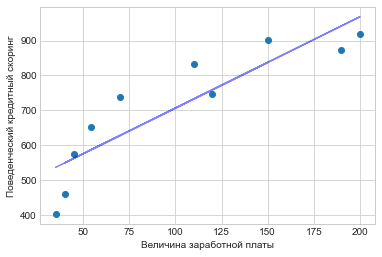

In [23]:
ox = zp
oy = b0 + b1 * ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='blue', alpha=0.5)

plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг');

Модель линейной регрессии имеет вид:
$y = 444.17 + 2.62 \cdot x,$

In [25]:
ks_hat = 444.17 + 2.62 * zp
ks_hat

array([535.87, 562.07, 941.97, 968.17, 548.97, 627.57, 585.65, 837.17,
       758.57, 732.37])

In [26]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [27]:
mse = ((ks - ks_hat) ** 2).sum() / n
mse

6470.419059999998

Без использования intercept

$y = b_1x$

In [28]:
zp = zp.reshape((10, 1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [29]:
ks = ks.reshape((10, 1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [30]:
B = np.dot(np.linalg.inv(np.dot(zp.T, zp)),zp.T @ ks)
B

array([[5.88982042]])

С использованием intercept

In [31]:
ones = np.ones((zp.shape[0], 1))
zp2 = np.hstack((ones, zp))

In [32]:
zp2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [33]:
B = np.dot(np.linalg.inv(np.dot(zp2.T, zp2)),zp2.T @ ks)
B

array([[444.17735732],
       [  2.62053888]])

## №2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

$y = b_1x$

In [34]:
def mse_(B1, y = ks, X = zp, n = 10):
    return np.sum((B1 * X - y) ** 2) / n

In [35]:
B1 = 0.1

In [36]:
a = 1e-6

In [39]:
for i in range (10000):
    B1 -= a * (2 / n) * np.sum((B1 * zp - ks) * zp)
    if i % 5000 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 5000, B1 = 5.889820420132673, mse = 56516.85841571943


## №*3. 

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$y = b_0 + b_1 x$

In [42]:
B0 = 0.1

In [43]:
B1 = 0.1

In [44]:
def mse_(B0, B1, y = ks, X = zp, n = 10):
    return np.sum((B0 + B1 * X - y) ** 2) / n 

In [48]:
for i in range (3500000):
    ks_pred = B0 + B1 * zp
    B0 -= a * (2 / n) * np.sum((ks_pred - ks))
    B1 -= a * (2 / n) * np.sum((ks_pred - ks) * zp)
    if i % 300000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration: 0, B0 = 0.10139932, B1 = 0.2595078, mse = 493102.2473380378
Iteration: 300000, B0 = 62.829650296108134, B1 = 5.427426609637098, mse = 43359.906132935954
Iteration: 600000, B0 = 116.66662135528688, B1 = 5.031162699949339, mse = 33679.34505450296
Iteration: 900000, B0 = 162.90312858733543, B1 = 4.690841564387336, mse = 26539.162221632003
Iteration: 1200000, B0 = 202.61217162895628, B1 = 4.398565451224586, mse = 21272.710156119996
Iteration: 1500000, B0 = 236.71526880642702, B1 = 4.147551578153019, mse = 17388.28338336958
Iteration: 1800000, B0 = 266.0038425924235, B1 = 3.9319747258657687, mse = 14523.210054084338
Iteration: 2100000, B0 = 291.15758595931146, B1 = 3.7468320535766986, mse = 12409.990868239614
Iteration: 2400000, B0 = 312.76023585238033, B1 = 3.587826999283546, mse = 10851.323841546426
Iteration: 2700000, B0 = 331.3131198345605, B1 = 3.4512695704735044, mse = 9701.683086636143
Iteration: 3000000, B0 = 347.2467902759279, B1 = 3.33399071134467, mse = 8853.7317007938

In [49]:
a1 = 5e-6

In [50]:
for i in range (3500000):
    ks_pred = B0 + B1 * zp
    B0 -= a1 * (2 / n) * np.sum((ks_pred - ks))
    B1 -= a1 * (2 / n) * np.sum((ks_pred - ks) * zp)
    if i % 300000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration: 0, B0 = 368.9630359574116, B1 = 3.174149541825204, mse = 7905.445845018561
Iteration: 300000, B0 = 409.0357020777073, B1 = 2.8791970020364066, mse = 6783.6741139898395
Iteration: 600000, B0 = 427.75846380740404, B1 = 2.741389197897374, mse = 6538.797204016174
Iteration: 900000, B0 = 436.506117525625, B1 = 2.6770025989713946, mse = 6485.341853538462
Iteration: 1200000, B0 = 440.5931986239634, B1 = 2.6469198750852696, mse = 6473.672829721494
Iteration: 1500000, B0 = 442.5027657424608, B1 = 2.632864616825009, mse = 6471.125542768489
Iteration: 1800000, B0 = 443.3949541997905, B1 = 2.626297715319885, mse = 6470.5694833308835
Iteration: 2100000, B0 = 443.81180272827436, B1 = 2.6232295258509235, mse = 6470.4480984598995
Iteration: 2400000, B0 = 444.0065628086927, B1 = 2.621796005550667, mse = 6470.421600776545
Iteration: 2700000, B0 = 444.09755866529, B1 = 2.621126235814532, mse = 6470.415816470669
Iteration: 3000000, B0 = 444.14007377362674, B1 = 2.620813305820163, mse = 6470.414

In [51]:
a2 = 5e-5

In [52]:
for i in range (3500000):
    ks_pred = B0 + B1 * zp
    B0 -= a2 * (2 / n) * np.sum((ks_pred - ks))
    B1 -= a2 * (2 / n) * np.sum((ks_pred - ks) * zp)
    if i % 300000 == 0:
        print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration: 0, B0 = 444.1668689026894, B1 = 2.620616081823456, mse = 6470.414229081573
Iteration: 300000, B0 = 444.17735212572575, B1 = 2.6205389206670087, mse = 6470.414201176663
Iteration: 600000, B0 = 444.1773573216328, B1 = 2.6205388824228355, mse = 6470.414201176658
Iteration: 900000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 1200000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 1500000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 1800000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 2100000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 2400000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 2700000, B0 = 444.17735732323933, B1 = 2.6205388824110107, mse = 6470.414201176658
Iteration: 3000000, B0 = 444.17735732323933, B1 = 2.6205388824110107, ms